In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *
import statistics

In [ ]:

df = pd.read_csv('prices_round_2_day_-1.csv', delimiter=';')
df.fillna(0, inplace=True)

In [ ]:
df

In [ ]:
sns.scatterplot(data=df, x='timestamp', y='SUNLIGHT', s = 1)
plt.title('SUNLIGHT')
plt.xlabel('Time')
plt.ylabel('Profits')

In [ ]:
# gonna try guess the price of orchids by JUST using sunlight and humidity

def guess():
    # guessing using lin reg - shit has a price of its own
    # keep track of sunlight at the current time step and how long it has
    # been since it dropped 

    # keep track of humidity - if it is outside range, it will fall



    # im just gonna use kalman filter using the data as an index and yolo
    # this needs to be tracked with fake avg price of orchids
    past_vals = 15
        
    df_star = df
    df_star = df_star.reset_index()
    # print(df_star)
    success = 0
    lst = np.array([])
    # sunlight_lst = 
    x = np.array([i for i in range(past_vals)])
    time = []
    gradient_lst = []
    for index, row in df_star.iterrows():
        if index == 9999:
            break
        curr_price = row["ORCHIDS"]
        sunlight = row["SUNLIGHT"]
        humidity = row["HUMIDITY"]
        

        if len(lst) < past_vals:
            lst = np.append(lst, curr_price)
            continue
        else:
            lst = lst[1:]
            lst = np.append(lst, curr_price)
            
        
        gradient, c = np.polyfit(x, lst, 1)
        time.append(row["timestamp"])
        gradient_lst.append(lst.tolist())
        # cant do sd calcs because we only have "TRUE" price


        # if len(lst) >= past_vals:
        #     diff_lst = []         
            # for i in range(past_vals):
            #     c_avg = df_star.iloc[index-i]["mid_price"]
            #     c_lin_reg = gradient * (past_vals - i) + c
            #     diff = c_lin_reg - c_avg
            #     diff_lst.append(diff)


        #     sd = statistics.stdev(diff_lst, 0)
        # else:
        #     sd = 1
        # df["lin_reg_avg_price"] = df
        # print(c, gradient)
        # predicting a down trend
        # if curr_avg - curr_mid < 0:
        pred = (past_vals+1) * gradient + c
        pred = float(round(pred * 2) / 2)

        next_mid = df_star.iloc[index+1]["ORCHIDS"]
        # give a buffer
        # print(f"pred: {pred}, next_mid: {float(next_mid)}")
        # print(f"sd: {sd}")
        sd = 0.5
        if next_mid < (pred + sd) and next_mid > (pred - sd):
            print(f"pred: {pred}, next_mid: {next_mid}")
            success += 1

        # if pred == next_mid:
        #     success += 1

            # if gradient < 0:
            #     if next_mid < curr_mid:
            #         success += 1
            
            # # if curr_avg - curr_mid > 0:
            # if gradient > 0:
            #     if next_mid > curr_mid:
            #         success += 1
        # success_lst.append(success)
        # print(test)
        # return success
        
    
    # return gradient_lst, time
    return success

out = guess()

In [ ]:
print(out/10000)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as smf
import random
import math

In [2]:
df = pd.read_csv('prices_round_2_day_-1.csv', delimiter=';')
df.insert(2, "random", [random.randint(0, 100) for _ in range(len(df))], True)
df

,timestamp,ORCHIDS,random,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,79,1.5,10.5,-2.0,2500.0000,79.000000,-1
1,100,1201.75,56,1.5,9.5,-2.0,2499.4197,79.004100,-1
2,200,1201.75,78,1.5,9.5,-2.0,2498.8457,79.008210,-1
3,300,1201.75,25,1.5,9.5,-2.0,2498.2780,79.012340,-1
4,400,1201.75,65,1.5,9.5,-2.0,2497.7166,79.016490,-1
...,...,...,...,...,...,...,...,...,...
9996,999600,1227.75,60,1.4,8.5,-3.0,3901.9530,83.025764,-1
9997,999700,1226.75,26,1.4,8.5,-3.0,3901.4612,83.019300,-1
9998,999800,1227.75,32,1.4,8.5,-3.0,3900.9720,83.012856,-1
9999,999900,1228.00,31,1.4,8.5,-3.0,3900.4849,83.006424,-1


In [10]:
x = df[['SUNLIGHT', 'HUMIDITY', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF']]
# x = df.drop(['ORCHIDS'], axis=1)
# x = df['TRANSPORT_FEES']
y = df['ORCHIDS']
x = smf.add_constant(x)
# model = smf.ols(formula='ORCHIDS ~ TRANSPORT_FEES + EXPORT_TARIFF + IMPORT_TARIFF + SUNLIGHT + HUMIDITY', data=df).fit()
model = smf.OLS(y, x).fit()
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ORCHIDS   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2167.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:18:45   Log-Likelihood:                -41466.
No. Observations:               10001   AIC:                         8.294e+04
Df Residuals:                    9995   BIC:                         8.299e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1013.5712      3.524    287.

Text(0.5, 0, 'TRANSPORT_FEES')

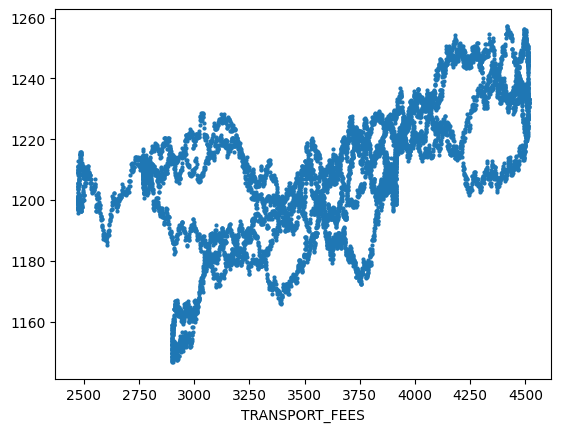

In [6]:
plt.scatter(df['SUNLIGHT'], df['ORCHIDS'], s =4)
plt.xlabel('TRANSPORT_FEES')

In [ ]:
model.pvalues

Text(0.5, 0, 'TRANSPORT_FEES')

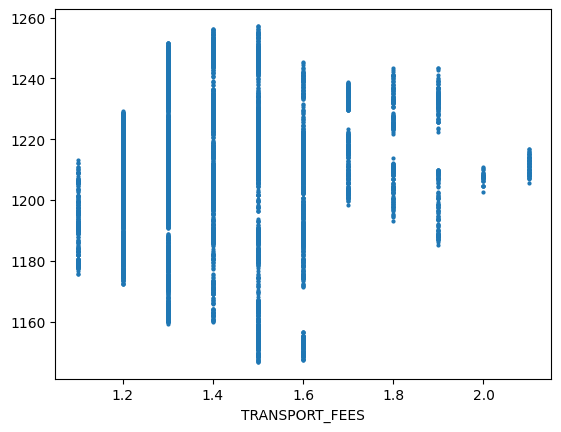

In [11]:
plt.scatter(df['TRANSPORT_FEES'], df['ORCHIDS'], s =4)
plt.xlabel('TRANSPORT_FEES')